In [7]:
import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = dd.read_parquet("hf://datasets/Weijie1996/load_timeseries/30m_resolution_ge/ge_30m.parquet")
df = df.compute()
# Uncomment below if wanna save the data frame
# df.to_csv('TUDelft.csv', index=False) 
df

In [ ]:
print(df.info())
print(df.head())

print("Columns:", df.columns.tolist())
print("Unique IDs:", df['id'].nunique())
print("Time range:", df['datetime'].min(), "to", df['datetime'].max())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232538 entries, 0 to 232537
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   datetime  232538 non-null  datetime64[ns]
 1   id        232538 non-null  string        
 2   target    232538 non-null  float64       
 3   category  232538 non-null  string        
 4   hour      232538 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), string(2)
memory usage: 9.5 MB
None
             datetime    id  target category  hour
0 2015-05-21 15:30:00  GE_1   0.157      30m    15
1 2015-05-21 16:00:00  GE_1   0.584      30m    16
2 2015-05-21 16:30:00  GE_1   0.545      30m    16
3 2015-05-21 17:00:00  GE_1   0.677      30m    17
4 2015-05-21 17:30:00  GE_1   0.351      30m    17
Columns: ['datetime', 'id', 'target', 'category', 'hour']
Unique IDs: 6
Time range: 2015-04-15 09:00:00 to 2019-05-01 22:00:00


In [24]:
print(df.isna().sum())
print(df.describe())

datetime    0
id          0
target      0
category    0
hour        0
dtype: int64
                            datetime         target           hour
count                         232538  232538.000000  232538.000000
mean   2016-12-03 21:24:05.183153408       0.492859      11.501819
min              2015-04-15 09:00:00       0.000000       0.000000
25%              2016-04-04 14:37:30       0.093000       6.000000
50%              2016-10-23 11:15:00       0.201000      12.000000
75%              2017-06-22 20:00:00       0.482000      18.000000
max              2019-05-01 22:00:00     803.940000      23.000000
std                              NaN       1.856273       6.922164


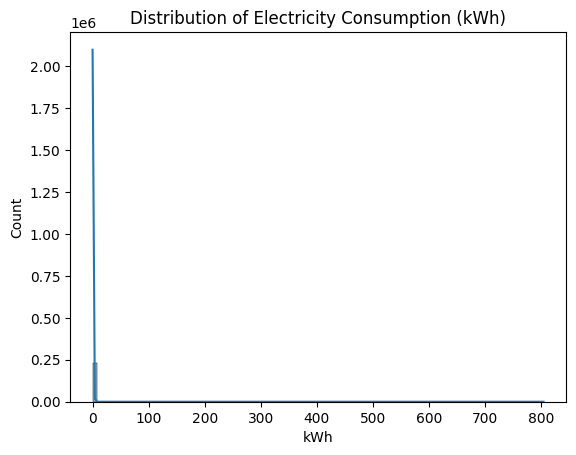

In [27]:
sns.histplot(df['target'], bins=100, kde=True)
plt.title("Distribution of Electricity Consumption (kWh)")
plt.xlabel("kWh")
plt.show()


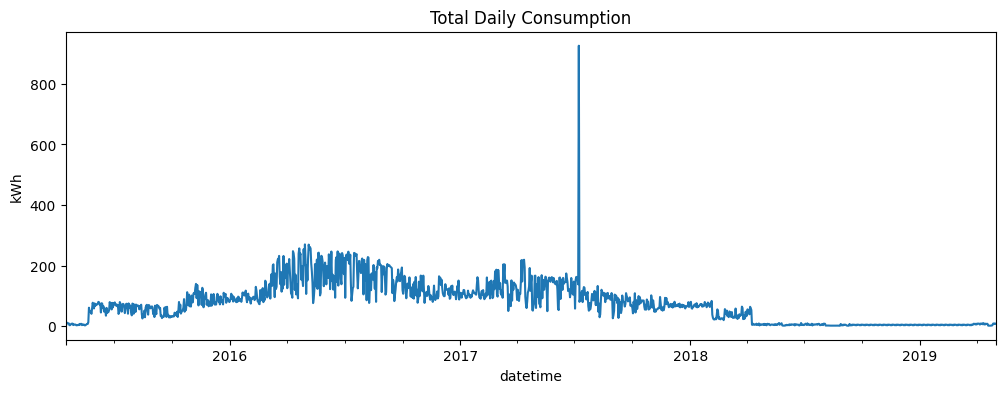

In [28]:
daily_total = df.resample('D', on='datetime')['target'].sum()

daily_total.plot(figsize=(12, 4))
plt.title("Total Daily Consumption")
plt.ylabel("kWh")
plt.show()


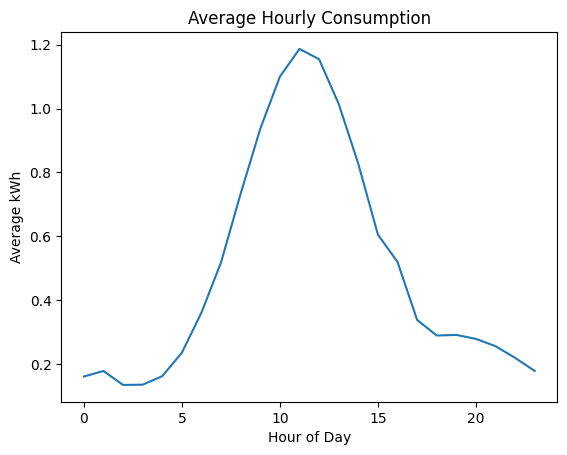

In [29]:
df['hour'] = df['datetime'].dt.hour
hourly_avg = df.groupby('hour')['target'].mean()

sns.lineplot(x=hourly_avg.index, y=hourly_avg.values)
plt.title("Average Hourly Consumption")
plt.xlabel("Hour of Day")
plt.ylabel("Average kWh")
plt.show()


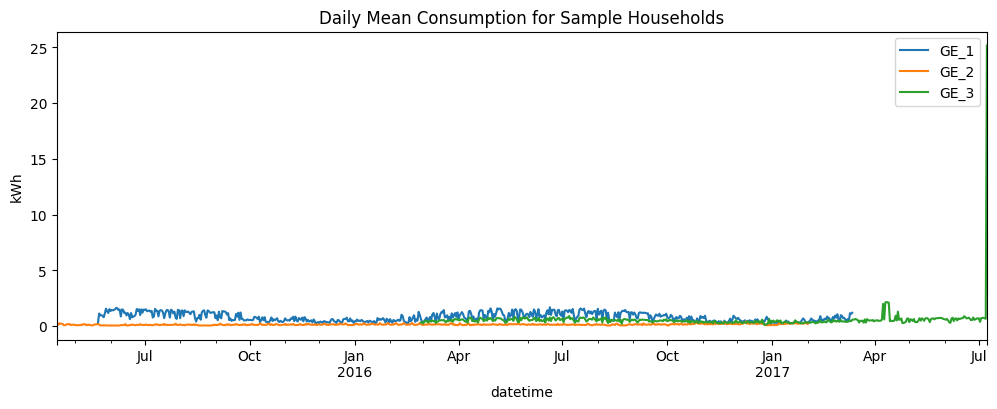

In [30]:
sample_ids = df['id'].unique()[:3]

for uid in sample_ids:
    subset = df[df['id'] == uid].set_index('datetime').resample('D')['target'].mean()
    subset.plot(label=uid, figsize=(12, 4))

plt.title("Daily Mean Consumption for Sample Households")
plt.ylabel("kWh")
plt.legend()
plt.show()


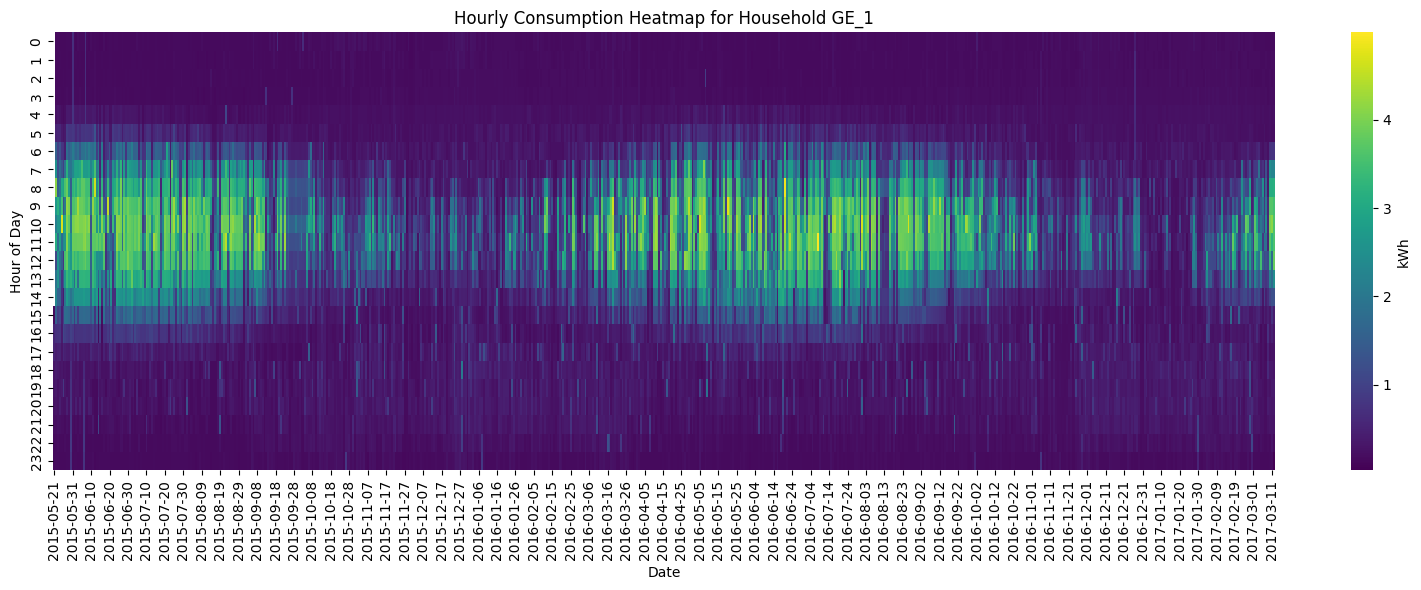

In [31]:
house_id = sample_ids[0]
subset = df[df['id'] == house_id].copy()

subset['day'] = subset['datetime'].dt.date
subset['hour'] = subset['datetime'].dt.hour

pivot_table = subset.groupby(['day', 'hour'])['target'].mean().unstack()

plt.figure(figsize=(16, 6))
sns.heatmap(pivot_table.T, cmap='viridis', cbar_kws={'label': 'kWh'})
plt.title(f"Hourly Consumption Heatmap for Household {house_id}")
plt.xlabel("Date")
plt.ylabel("Hour of Day")
plt.tight_layout()
plt.show()


# Faraday Dataset